In [1]:
import pandas as pd
import os
import seaborn as sb
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, Title
from bokeh.io import output_notebook
from bokeh.models.tools import HoverTool


C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[COVID Github Page](https://github.com/CSSEGISandData/COVID-19)

In [2]:
url =  "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
#url3 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

covx = pd.read_csv(url,index_col=0,parse_dates=[0])
covy = pd.read_csv(url2,index_col=0,parse_dates=[0])
#covz = pd.read_csv(url3,index_col=0,parse_dates=[0])

In [3]:
covx

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,855,855,855,858,861,862,877,880,880,880
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,458,462,506,525,541,576,607,638,687,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,0,...,727,727,729,732,732,737,740,741,743,746
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,1380,1389,1465,1498,1516,1526,1552,1576,1581,1606
NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,...,314,317,317,317,321,321,328,328,328,334


In [4]:
cov0 = covx.reset_index()
cov0y = covy.reset_index()
#cov0z = covz.reset_index()

In [5]:
cov0

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,499,513,513,514,611,632,639,659,661,662
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,482,484,496,524,560,591,632,705,728,844
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,141,141,141,141,162,162,163,176,176,176
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097


In [6]:
path = os.getcwd()

In [7]:
covlst = [ 'US', 'Canada', 'South Korea', 'Italy', 'Iran', 'UK', 'United Kingdom', 'Mexico', 'Sweden']

In [8]:
cov = cov0[(cov0['Country/Region'].isin(covlst))]

In [9]:
cov

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,7138,7138,7202,7229,7276,7316,7346,7383,7433,7453
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,2632,2632,2659,2669,2680,2694,2709,2709,2709,2745
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,300,300,300,300,300,300,301,303,304,304
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,136,137,146,147,151,153,154,157,157,160
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,1058,1059,1059,1060,1061,1061,1061,1061,1061,1061
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,...,31620,32096,32395,32678,32936,33173,33378,33625,33806,33986
43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,27,27,27,27,27,27,27,27,27,27
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,52624,52849,53047,53185,53341,53485,53666,53824,53952,54054


In [10]:
#change the file from wide to long
df0 = cov.set_index(['Province/State','Country/Region', 'Lat', 'Long']).stack().reset_index(level=4).reset_index()


In [11]:
df0

,Province/State,Country/Region,Lat,Long,level_4,0
0,Alberta,Canada,53.9333,-116.5765,1/22/20,0
1,Alberta,Canada,53.9333,-116.5765,1/23/20,0
2,Alberta,Canada,53.9333,-116.5765,1/24/20,0
3,Alberta,Canada,53.9333,-116.5765,1/25/20,0
4,Alberta,Canada,53.9333,-116.5765,1/26/20,0
...,...,...,...,...,...,...
4375,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,6/11/20,13
4376,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,6/12/20,13
4377,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,6/13/20,13
4378,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,6/14/20,13


In [12]:
df = df0[df0[0]>=1]

In [13]:
df

,Province/State,Country/Region,Lat,Long,level_4,0
44,Alberta,Canada,53.9333,-116.5765,3/6/20,1
45,Alberta,Canada,53.9333,-116.5765,3/7/20,2
46,Alberta,Canada,53.9333,-116.5765,3/8/20,4
47,Alberta,Canada,53.9333,-116.5765,3/9/20,7
48,Alberta,Canada,53.9333,-116.5765,3/10/20,7
...,...,...,...,...,...,...
4375,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,6/11/20,13
4376,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,6/12/20,13
4377,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,6/13/20,13
4378,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,6/14/20,13


In [14]:
#convert the date from text to date format
df['date'] = pd.to_datetime(df['level_4'])
df['value'] = df[0]

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df['date'].max()

Timestamp('2020-06-15 00:00:00')

In [16]:
#drop the province varible
df.drop(['Province/State', 'level_4', 0, 'Lat', 'Long' ], inplace=True, axis=1)

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df

,Country/Region,date,value
44,Canada,2020-03-06,1
45,Canada,2020-03-07,2
46,Canada,2020-03-08,4
47,Canada,2020-03-09,7
48,Canada,2020-03-10,7
...,...,...,...
4375,United Kingdom,2020-06-11,13
4376,United Kingdom,2020-06-12,13
4377,United Kingdom,2020-06-13,13
4378,United Kingdom,2020-06-14,13


In [18]:
#sum up country numbers
df2 = df.groupby(['Country/Region', 'date']).sum().reset_index()

In [19]:
df2

,Country/Region,date,value
0,Canada,2020-01-26,1
1,Canada,2020-01-27,1
2,Canada,2020-01-28,2
3,Canada,2020-01-29,2
4,Canada,2020-01-30,2
...,...,...,...
921,United Kingdom,2020-06-11,292860
922,United Kingdom,2020-06-12,294402
923,United Kingdom,2020-06-13,295828
924,United Kingdom,2020-06-14,297342


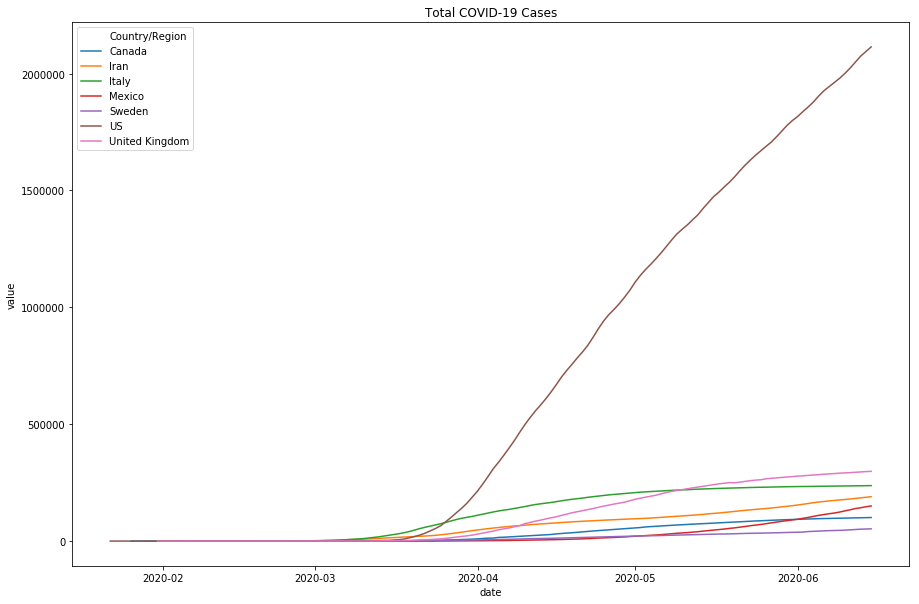

In [20]:
plt.figure(figsize=(15, 10))

s = sb.lineplot('date', 'value', data=df2, hue='Country/Region')

plt.title('Total COVID-19 Cases')

plt.show()

[Seaborn](https://seaborn.pydata.org/index.html)

In [21]:
country = ['US']

In [22]:
UScases = df2[(df2['Country/Region'].isin(country))]

In [23]:
YOUR_FONT_SIZE = '7pt'
#output_file("USCovid.html")

source = ColumnDataSource(UScases)

p = figure(x_axis_type="datetime", plot_width=750, plot_height=300)

p.circle(x='date', y='value', source=UScases, color = 'blue', size = 6)
p.line(x='date', y='value', line_width = 1, source=UScases, color = 'blue')
p.legend.location = 'bottom_right'

p.add_tools(HoverTool(
    tooltips=[
        ( 'date',   '@date{%F}'),
        ( '# of Cases', '@value'),
    ],

    formatters={
        'date'      : 'datetime', # use 'datetime' formatter for 'date' field
      },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

p.xaxis[0].axis_label = 'Date'
p.yaxis[0].axis_label = '# of Cases (cumulative)'


#p.add_layout(Title(text=market), 'above')
p.add_layout(Title(text=('Covid-19 Cases - Linear Scale' + '-Country = ' + country[0])), 'above')

show(p)



C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\bokeh\models\plots.py:55: UserWarning: 
You are attemptings to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [24]:
YOUR_FONT_SIZE = '7pt'
output_file("USCovid.html")

source = ColumnDataSource(UScases)

p = figure(x_axis_type="datetime", y_axis_type="log", plot_width=750, plot_height=300)

p.circle(x='date', y='value', source=UScases, color = 'blue', size = 6)
p.line(x='date', y='value', line_width = 1, source=UScases, color = 'blue')
p.legend.location = 'bottom_right'

p.add_tools(HoverTool(
    tooltips=[
        ( 'date',   '@date{%F}'),
        ( '# of Cases', '@value'),
    ],

    formatters={
        'date'      : 'datetime', # use 'datetime' formatter for 'date' field
      },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

p.xaxis[0].axis_label = 'Date'
p.yaxis[0].axis_label = '# of Cases (cumulative)'


#p.add_layout(Title(text=market), 'above')
p.add_layout(Title(text='Covid-19 Cases - Logrithmic Scale' + '-Country = ' + country[0]), 'above')


show(p)


[Bokeh Visualization](https://docs.bokeh.org/en/latest/index.html#)

[Covid 19 Tracker](https://www.worldometers.info/coronavirus/country/us/)